In [6]:
import numpy as np
import pandas as pd
from sklearn.externals import joblib
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# Obtain train data

In [5]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('./UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('/home/ajay/Applied_course/HumanityRecognition/UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('/home/ajay/Applied_course/HumanityRecognition/UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2370,0.345275,0.011489,-0.075337,-0.327995,0.316022,0.493599,-0.393615,0.216999,0.449999,0.103004,...,-0.052356,-0.029338,0.64894,0.910792,-0.4174,0.321225,0.353633,14,2,WALKING_UPSTAIRS


In [7]:
train.shape

(7352, 564)

# Obtain test data

In [8]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('/home/ajay/Applied_course/HumanityRecognition/UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('/home/ajay/Applied_course/HumanityRecognition/UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('/home/ajay/Applied_course/HumanityRecognition/UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1341,0.368179,-0.021706,-0.139743,-0.22697,-0.109306,-0.303456,-0.283783,-0.145665,-0.26862,0.147085,...,-0.76809,0.729263,0.896864,0.555654,-0.720506,0.257303,0.130083,12,2,WALKING_UPSTAIRS


In [9]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicate

In [10]:
print("No of duplicates in train:{}".format(sum(train.duplicated())))
print("No of duplicates in tess:{}".format(sum(test.duplicated())))

No of duplicates in train:0
No of duplicates in tess:0


## 2.Checking for null values

In [11]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [12]:
## 3. Check for imbalance dataset
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

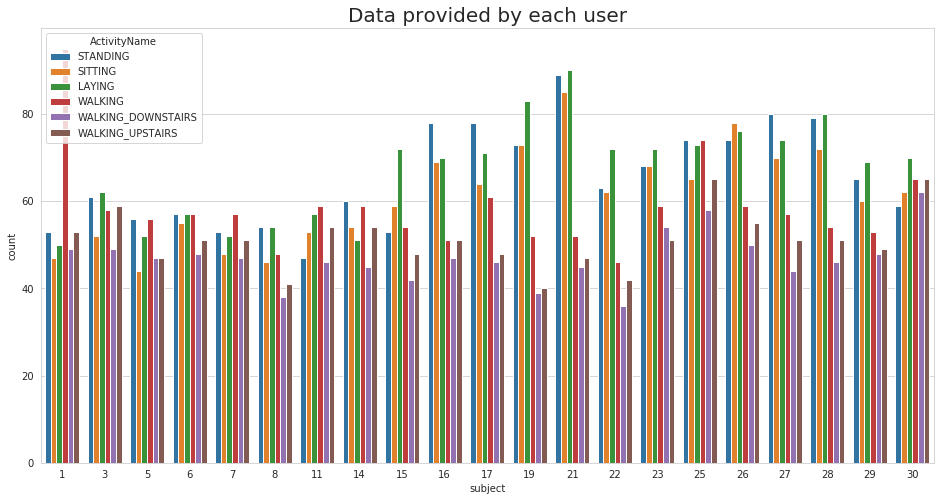

In [13]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user',fontsize=20)
sns.countplot(x='subject' , hue='ActivityName' , data=train)
plt.show()

> As we can see from graph we have almost same readings from all subject

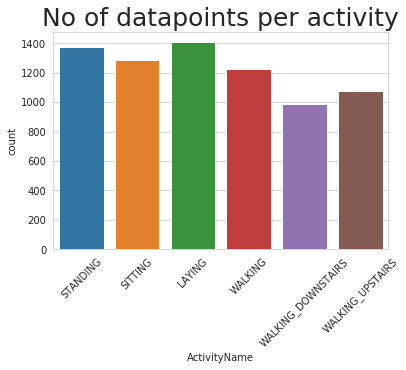

In [14]:
plt.title('No of datapoints per activity',fontsize=25)
sns.countplot(train.ActivityName)
plt.xticks(rotation=45)
plt.show()

> As we can see data is balanced

#### As we saw our features names thera are space and - between name so we need to replace all dis thing

## 4. Changing feature names

In [15]:
columns = train.columns

#Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index([u'tBodyAccmeanX', u'tBodyAccmeanY', u'tBodyAccmeanZ', u'tBodyAccstdX',
       u'tBodyAccstdY', u'tBodyAccstdZ', u'tBodyAccmadX', u'tBodyAccmadY',
       u'tBodyAccmadZ', u'tBodyAccmaxX',
       ...
       u'angletBodyAccMeangravity', u'angletBodyAccJerkMeangravityMean',
       u'angletBodyGyroMeangravityMean', u'angletBodyGyroJerkMeangravityMean',
       u'angleXgravityMean', u'angleYgravityMean', u'angleZgravityMean',
       u'subject', u'Activity', u'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in csv

In [16]:
train.to_csv('./UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('./UCI_HAR_Dataset/csv_files/test.csv', index=False)

## Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

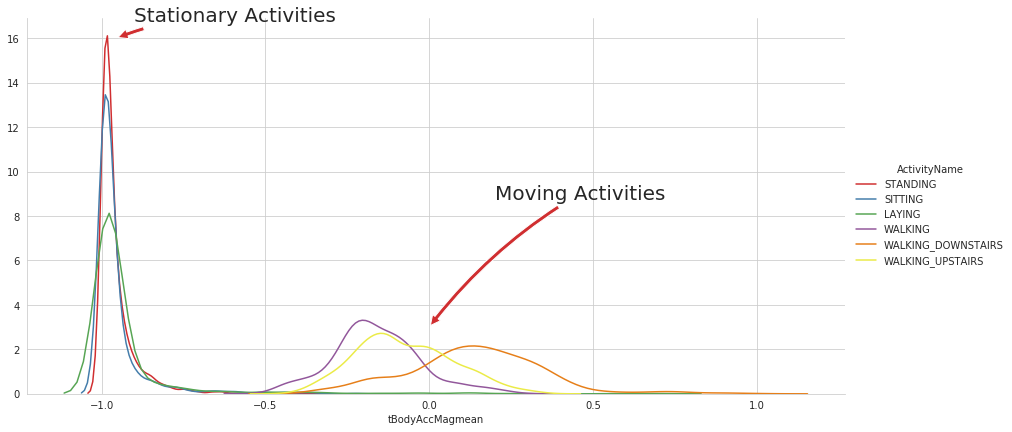

In [22]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,16), xytext=(-0.9, 17), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

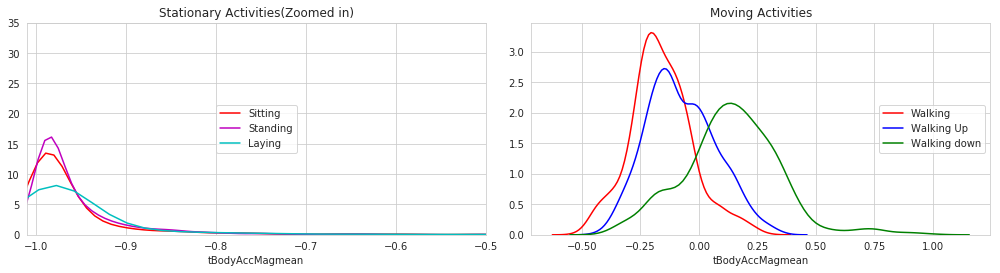

In [15]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

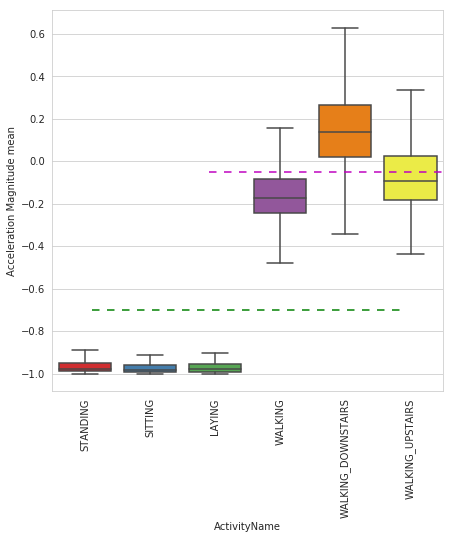

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

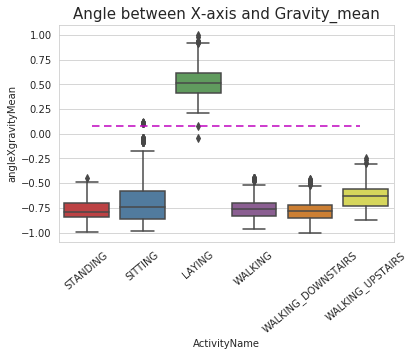

In [17]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

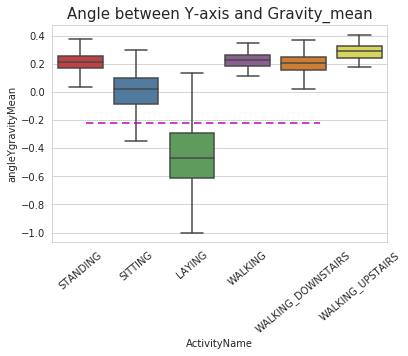

In [18]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [19]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# performs t-sne with different perplexity values and their repective plots..
import warnings
warnings.filterwarnings('ignore')

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.338s...
[t-SNE] Computed neighbors for 7352 samples in 39.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.032s
[t-SNE] Iteration 50: error = 124.7195587, gradient norm = 0.0301932 (50 iterations in 4.682s)
[t-SNE] Iteration 100: error = 107.0452652, gradient norm = 0.0245239 (50 iterations in

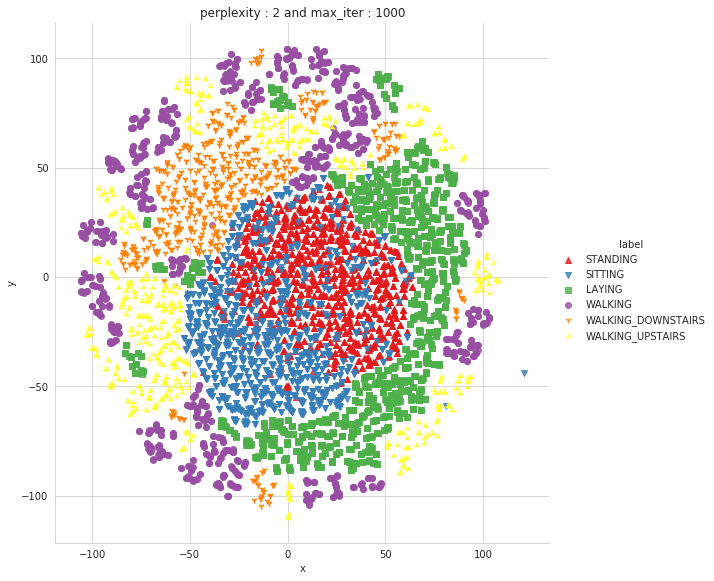

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.190s...
[t-SNE] Computed neighbors for 7352 samples in 31.553s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.052s
[t-SNE] Iteration 50: error = 114.0260239, gradient norm = 0.0204367 (50 iterations in 5.887s)
[t-SNE] Iteration 100: error = 97.3510666, gradient norm = 0.0158628 (50 iteratio

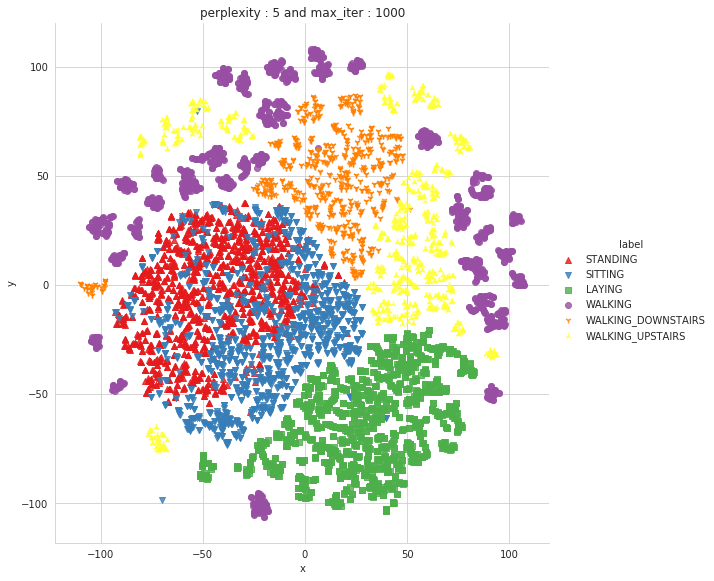

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.186s...
[t-SNE] Computed neighbors for 7352 samples in 35.796s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.093s
[t-SNE] Iteration 50: error = 106.0710754, gradient norm = 0.0154504 (50 iterations in 3.209s)
[t-SNE] Iteration 100: error = 90.9302750, gradient norm = 0.0133599 (50 iterati

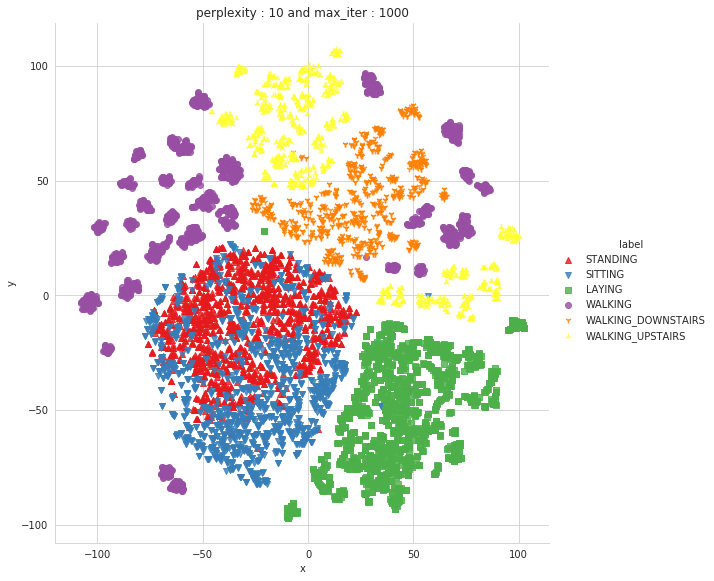

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.169s...
[t-SNE] Computed neighbors for 7352 samples in 32.647s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.182s
[t-SNE] Iteration 50: error = 97.7528000, gradient norm = 0.0154223 (50 iterations in 3.789s)
[t-SNE] Iteration 100: error = 84.1431503, gradient norm = 0.0076420 (50 iteratio

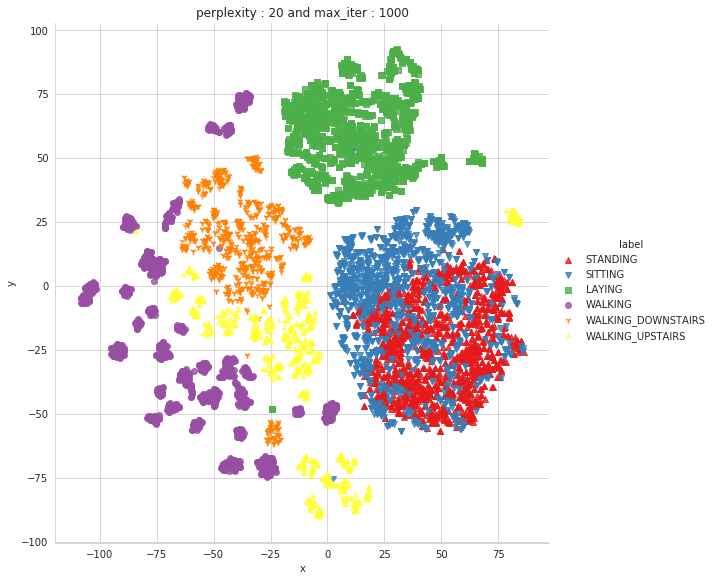

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.181s...
[t-SNE] Computed neighbors for 7352 samples in 33.324s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.448s
[t-SNE] Iteration 50: error = 86.4251633, gradient norm = 0.0213557 (50 iterations in 3.122s)
[t-SNE] Iteration 100: error = 75.4931717, gradient norm = 0.0047447 (50 iterati

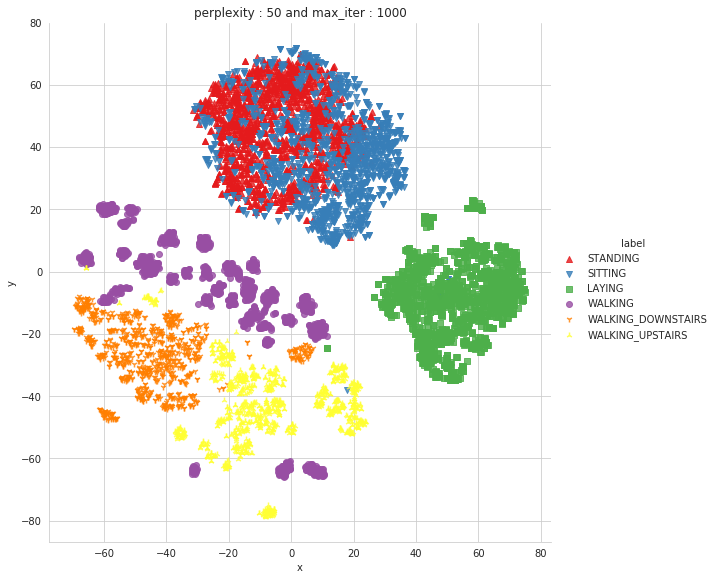

Done


In [21]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [22]:
train = pd.read_csv('/home/ajay/Applied_course/HumanityRecognition/UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('/home/ajay/Applied_course/HumanityRecognition/UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [23]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [24]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [25]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [26]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [27]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [28]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [29]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [30]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.3min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:22.879454


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.010317


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


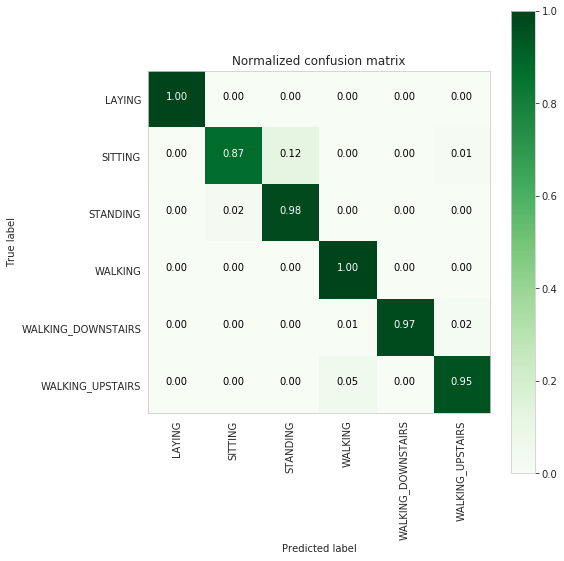

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [31]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


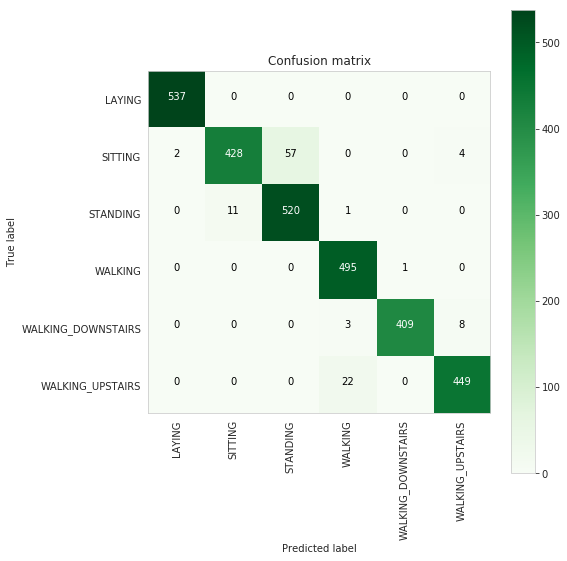

In [32]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [33]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9458650707290533



#  2. Linear SVC with GridSearch

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   23.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:27.646083


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005462


---------------------
|      Accuracy      |
---------------------

    0.9647098744485918


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 423  62   0   0   4]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   1 453]]


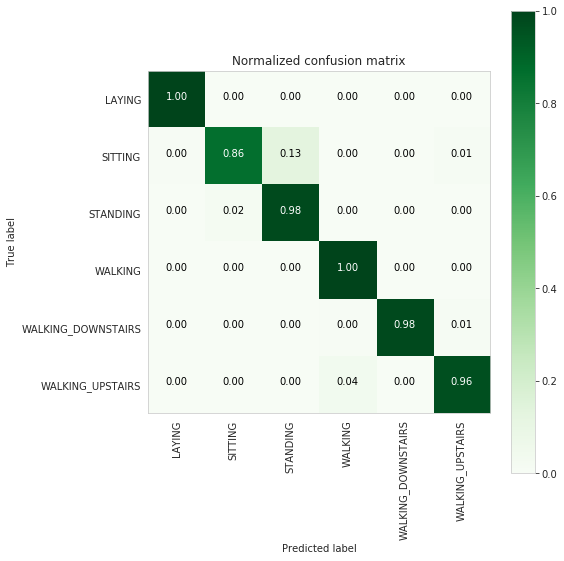

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.96      0.96      2947



In [34]:
from sklearn.svm import LinearSVC

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [35]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9464091403699674



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:32.098815


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.590302


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


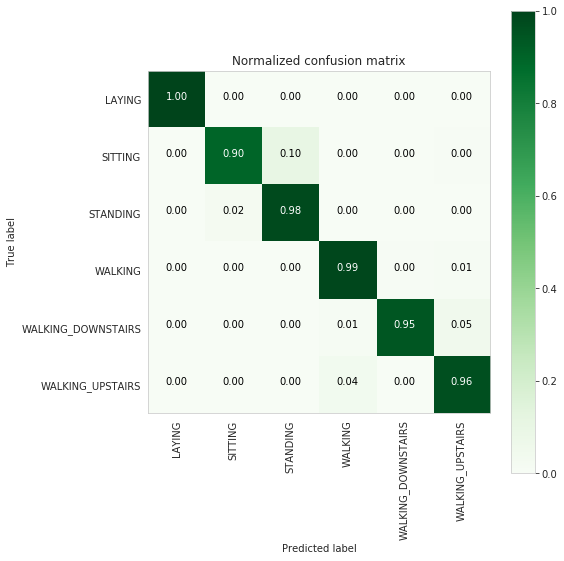

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [36]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [37]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:06.909694


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.003878


---------------------
|      Accuracy      |
---------------------

    0.8629114353579912


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  21 337  62]
 [  0   0   0  73  24 374]]


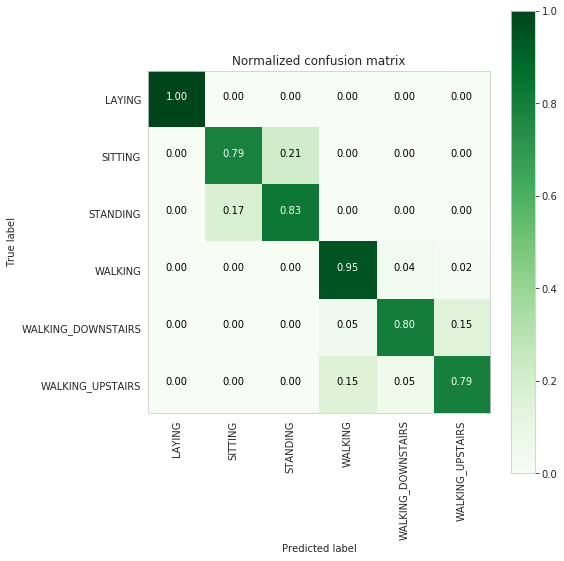

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.80      0.84       420
  WALKING_UPSTAIRS       0.84      0.79      0.82       471

         micro avg       0.86      0.86      0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_spl

In [38]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:03:27.473796


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.025375


---------------------
|      Accuracy      |
---------------------

    0.9100780454699695


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 428  63   0   0   0]
 [  0  54 478   0   0   0]
 [  0   0   0 481  11   4]
 [  0   0   0  36 338  46]
 [  0   0   0  45   6 420]]


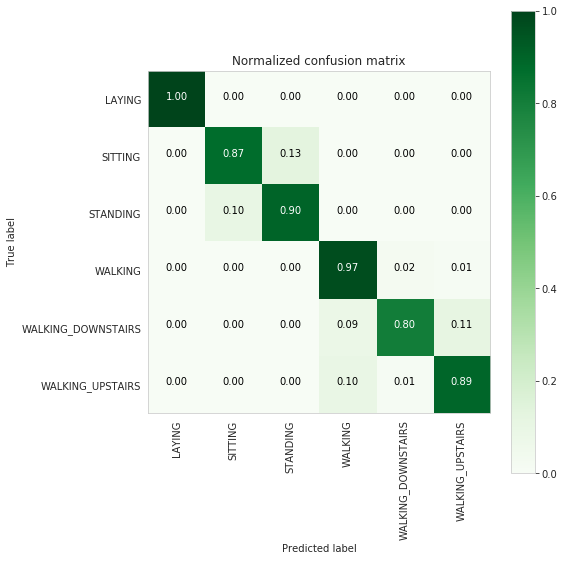

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.87      0.88       491
          STANDING       0.88      0.90      0.89       532
           WALKING       0.86      0.97      0.91       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.89      0.89      0.89       471

         micro avg       0.91      0.91      0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=

In [39]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:30:43.815238


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.057419


---------------------
|      Accuracy      |
---------------------

    0.9226331862911435


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 398  91   0   0   2]
 [  0  38 494   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  31   6 433]]


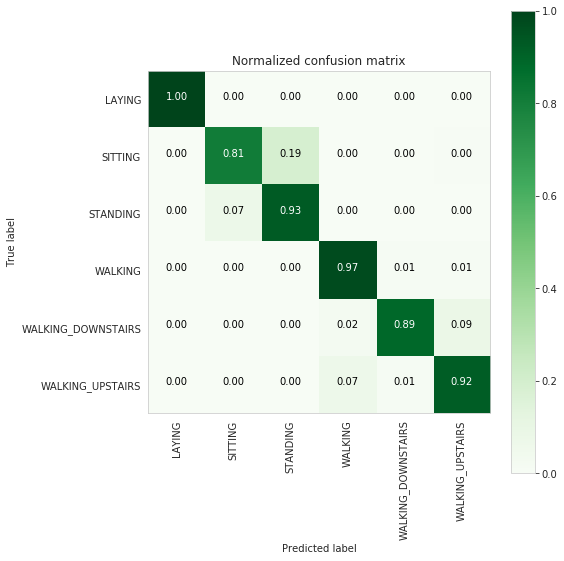

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

         micro avg       0.92      0.92      0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_s

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

# 7. Comparing all models

In [42]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.3%       3.699%
Linear SVC          : 96.47%       3.529% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.29%      13.71% 
Random Forest       : 91.01%      8.992% 
GradientBoosting DT : 91.01%      8.992% 


> We can choose ___Logistic regression___ or ___Linear SVC___ or ___rbf SVM___.

# Deep Learning

In [23]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [24]:
# Data directory
DATADIR = './UCI_HAR_Dataset'

In [25]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [26]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = '/home/ajay/Applied_course/HumanityRecognition/UCI_HAR_Dataset/'+str(subset)+'/Inertial Signals/'+str(signal)+'_' +str(subset)+'.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [27]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = '/home/ajay/Applied_course/HumanityRecognition/UCI_HAR_Dataset/'+str(subset)+'/y_'+str(subset)+'.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [28]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [29]:
# Importing tensorflow
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [30]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [31]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [32]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [33]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [34]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [35]:
# Loading the train and test data
import pandas as pd
X_train, X_test, Y_train, Y_test = load_data()

In [45]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM

### LSTM one layer,Dropout(0.5)

In [58]:
import warnings
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [60]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 24s 3ms/step - loss: 1.3306 - acc: 0.4361 - val_loss: 1.1743 - val_acc: 0.4723
Epoch 2/30
7352/7352 [==============================] - 21s 3ms/step - loss: 0.9716 - acc: 0.5788 - val_loss: 0.9656 - val_acc: 0.5263
Epoch 3/30
7352/7352 [==============================] - 21s 3ms/step - loss: 0.7787 - acc: 0.6510 - val_loss: 0.7841 - val_acc: 0.6135
Epoch 4/30
7352/7352 [==============================] - 21s 3ms/step - loss: 0.6911 - acc: 0.6587 - val_loss: 0.7109 - val_acc: 0.6203
Epoch 5/30
7352/7352 [==============================] - 20s 3ms/step - loss: 0.6496 - acc: 0.6794 - val_loss: 0.8000 - val_acc: 0.6362
Epoch 6/30
7352/7352 [==============================] - 21s 3ms/step - loss: 0.8295 - acc: 0.6221 - val_loss: 0.7970 - val_acc: 0.6318
Epoch 7/30
7352/7352 [==============================] - 28s 4ms/step - loss: 0.5920 - acc: 0.7

In [61]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  0      398        66        0                   0   
STANDING                 0      100       418        2                   0   
WALKING                  0        3         0      465                   8   
WALKING_DOWNSTAIRS       0        0         0        0                 360   
WALKING_UPSTAIRS         0        3         0       23                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                           27  
STANDING                          12  
WALKING                           20  
WALKING_DOWNSTAIRS                60  
WALKING_UPSTAIRS                 444  


In [62]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 1s 355us/step


In [63]:
score

[0.4692274864947224, 0.8805564981336953]

- With a simple 2 layer architecture we got 88.05% accuracy and a loss of 0.46
- We can further imporve the performace with Hyperparameter tuning

In [46]:
from keras.layers import BatchNormalization

### LSTM with 2 layer,Dropout(0.5),BatchNormalization

In [47]:
model2 = Sequential()
model2.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True))
model2.add(BatchNormalization())
model2.add(Dropout(0.50))
model2.add(LSTM(32))
model2.add(Dropout(0.50))
model2.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model2.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_______________________________________________________

In [48]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [49]:
# Training the model
history1  = model2.fit(X_train,
                           Y_train,
                           batch_size=batch_size,
                           validation_data=(X_test, Y_test),
                           epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 63s 9ms/step - loss: 1.1040 - acc: 0.5915 - val_loss: 0.9231 - val_acc: 0.6376
Epoch 2/30
7352/7352 [==============================] - 59s 8ms/step - loss: 0.7346 - acc: 0.7004 - val_loss: 0.9752 - val_acc: 0.5636
Epoch 3/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.6100 - acc: 0.7817 - val_loss: 0.4965 - val_acc: 0.8124
Epoch 4/30
7352/7352 [==============================] - 72s 10ms/step - loss: 0.4382 - acc: 0.8630 - val_loss: 0.3421 - val_acc: 0.8717
Epoch 5/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.3467 - acc: 0.8950 - val_loss: 0.3313 - val_acc: 0.8816
Epoch 6/30
7352/7352 [==============================] - 57s 8ms/step - loss: 0.2923 - acc: 0.9081 - val_loss: 0.2504 - val_acc: 0.9084
Epoch 7/30
7352/7352 [==============================] - 56s 8ms/step - loss: 0.2419 - acc: 0.9244 - val_loss: 0.2809 - val_acc: 0.8945
Epoch 

In [50]:
import seaborn as sns
def plot_confusion_matrix_lstm(y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, 
                xticklabels= list(ACTIVITIES.values()), 
                yticklabels=list(ACTIVITIES.values()), 
                annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  
    
# Plot train and cross validation loss
def plot_train_cv_loss(model, epochs, colors=['b']):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_axis_values = list(range(1,epochs+1))

    validation_loss = model.history['val_loss']
    train_loss = model.history['loss']   
    
    ax.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_axis_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

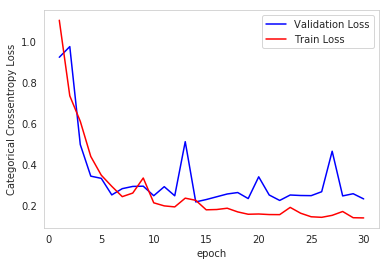

In [51]:
plot_train_cv_loss(history1, epochs)

In [86]:
scores = model2.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print("Test loss:",scores[0])

Test Accuracy: 92.297251%
('Test loss:', 0.23080599639119737)


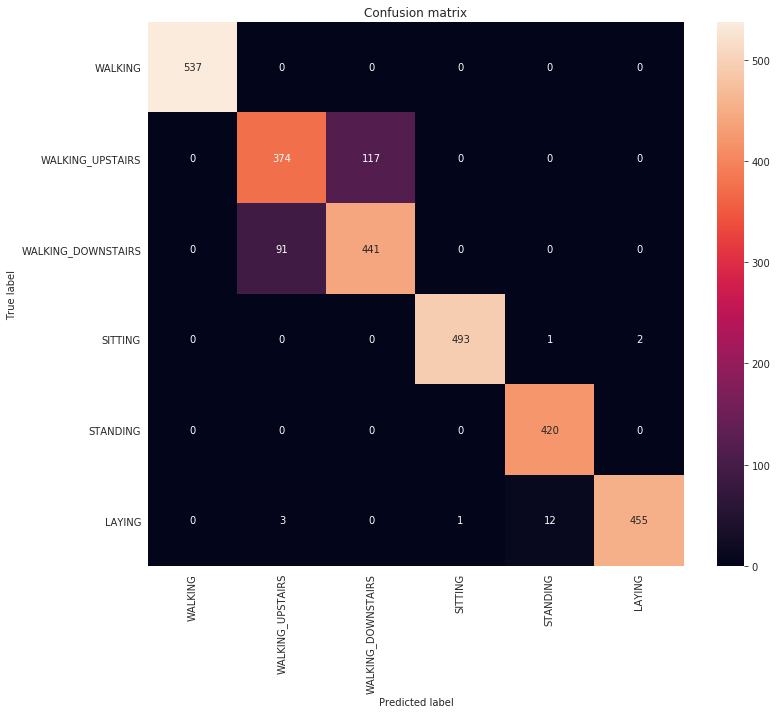

In [53]:
plot_confusion_matrix_lstm(Y_test,model2.predict(X_test))

In [54]:
joblib.dump(model2,"model2.pkl")

['model2.pkl']

In [55]:
from keras.regularizers import L1L2

### LSTM with 2 layer,BatchNormalization,Dropout(0.5),Regularization

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 48)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                10368     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 21,894
Trainable params: 21,798
Non-trainable params: 96
_______________________________________________________

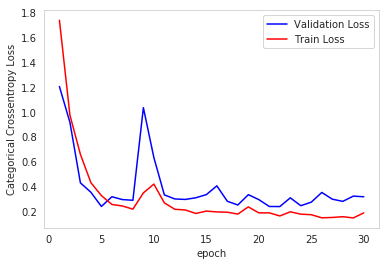

In [56]:
model3 = Sequential()
model3.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=L1L2(0.01, 0.01)))
model3.add(BatchNormalization())
model3.add(Dropout(0.50))
model3.add(LSTM(32))
model3.add(Dropout(0.50))
model3.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model3.summary()

model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Training the model
history3  = model3.fit(X_train,
                           Y_train,
                           batch_size=batch_size,
                           validation_data=(X_test, Y_test),
                           epochs=epochs)

plot_train_cv_loss(history3, epochs)

scores = model3.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()


In [87]:
scores = model3.evaluate(X_test, Y_test, verbose=0)
print("Test Loss:",scores[0])

('Test Loss:', 0.31985795800092187)


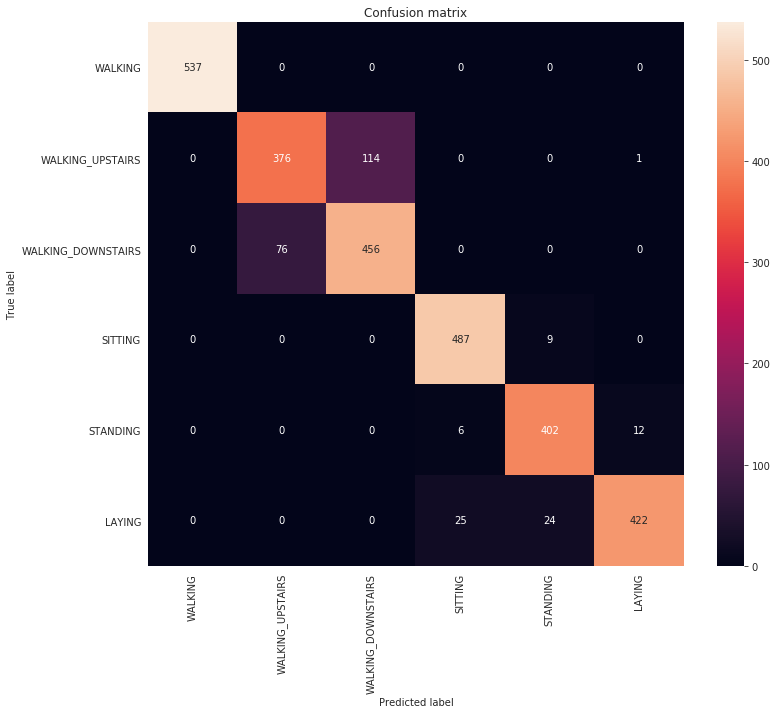

In [57]:
plot_confusion_matrix_lstm(Y_test,model3.predict(X_test))

In [58]:
joblib.dump(model3,"model3.pkl")

['model3.pkl']

### LSTM with 2 layer (64,48),BatchNormalization,Dropout(0.5)

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 48)                21696     
_________________________________________________________________
dropout_6 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 294       
Total params: 41,190
Trainable params: 41,062
Non-trainable params: 128
______________________________________________________

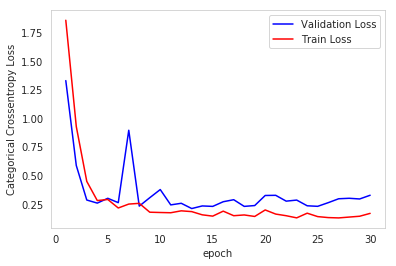

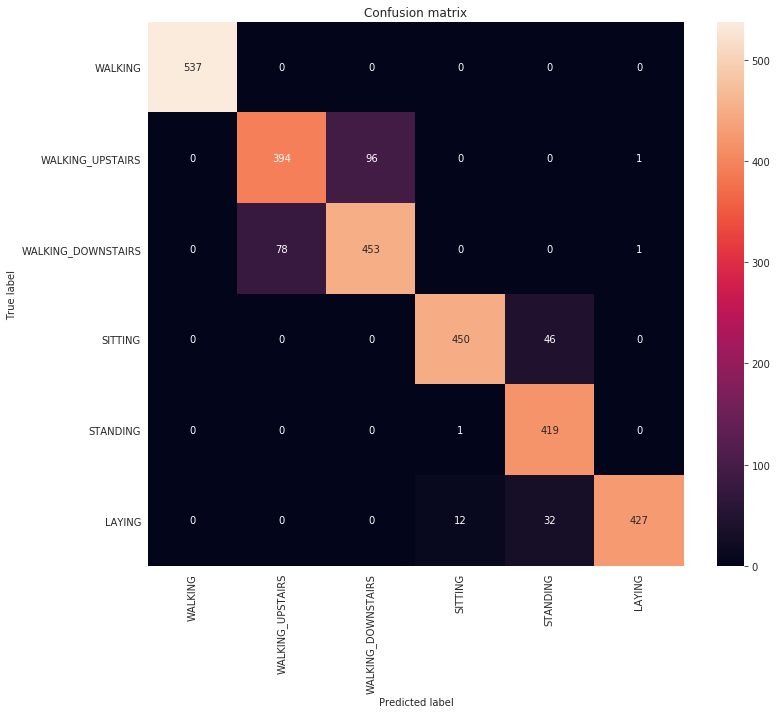

In [59]:
model4 = Sequential()
model4.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=L1L2(0.01,0.01)))
model4.add(BatchNormalization())
model4.add(Dropout(0.50))
model4.add(LSTM(48))
model4.add(Dropout(0.50))
model4.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model4.summary()

model4.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Training the model
history4  = model4.fit(X_train,
                           Y_train,
                           batch_size=batch_size,
                           validation_data=(X_test, Y_test),
                           epochs=epochs)

plot_train_cv_loss(history4, epochs)

scores = model4.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()
plot_confusion_matrix_lstm(Y_test,model4.predict(X_test))

In [88]:
scores = model4.evaluate(X_test, Y_test, verbose=0)
print("Test Loss:",scores[0])

('Test Loss:', 0.3290980258486624)


In [60]:
joblib.dump(model4,"model4.pkl")

['model4.pkl']

### LSTM with 2 layer (32,32),BatchNormalization,Dropout(0.70)

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_______________________________________________________

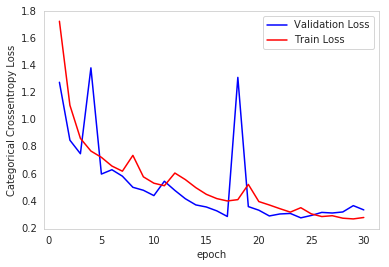

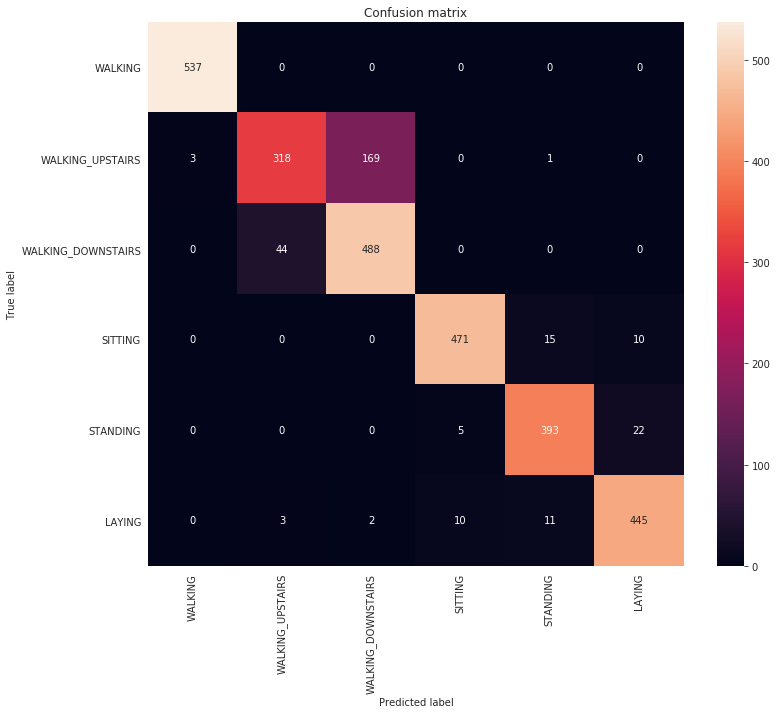

In [61]:
model5 = Sequential()
model5.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=L1L2(0.01,0.01)))
model5.add(BatchNormalization())
model5.add(Dropout(0.70))
model5.add(LSTM(32))
model5.add(Dropout(0.70))
model5.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model5.summary()

model5.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Training the model
history5  = model5.fit(X_train,
                           Y_train,
                           batch_size=batch_size,
                           validation_data=(X_test, Y_test),
                           epochs=epochs)

plot_train_cv_loss(history5, epochs)

scores = model5.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()
plot_confusion_matrix_lstm(Y_test,model5.predict(X_test))

In [89]:
scores = model5.evaluate(X_test, Y_test, verbose=0)
print("Test Loss:",scores[0])

('Test Loss:', 0.3307849670331173)


In [62]:
joblib.dump(model5,"model5.pkl")

['model5.pkl']

### LSTM with 2 layer (48,32),BatchNormalization,Dropout(0.70)

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 48)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                10368     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 198       
Total params: 21,894
Trainable params: 21,798
Non-trainable params: 96
_______________________________________________________

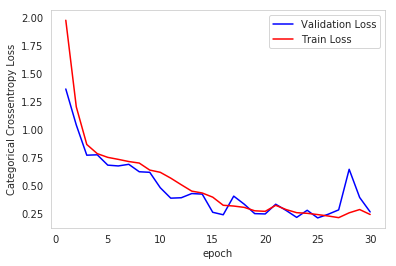

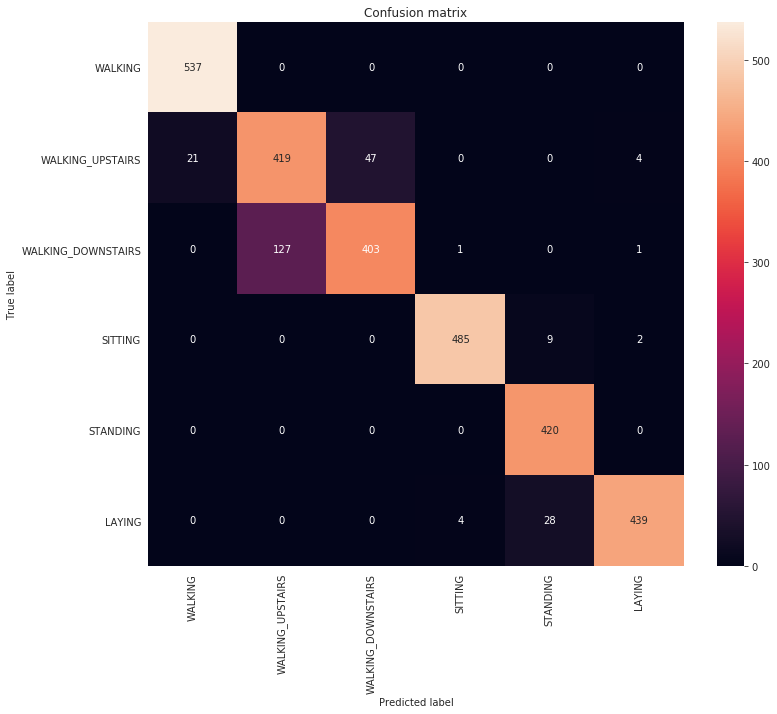

In [63]:
model6 = Sequential()
model6.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=L1L2(0.01,0.01)))
model6.add(BatchNormalization())
model6.add(Dropout(0.70))
model6.add(LSTM(32))
model6.add(Dropout(0.70))
model6.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model6.summary()

model6.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Training the model
history6  = model6.fit(X_train,
                           Y_train,
                           batch_size=batch_size,
                           validation_data=(X_test, Y_test),
                           epochs=epochs)

plot_train_cv_loss(history6, epochs)

scores = model6.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()
plot_confusion_matrix_lstm(Y_test,model6.predict(X_test))

In [90]:
scores = model6.evaluate(X_test, Y_test, verbose=0)
print("Test Loss:",scores[0])

('Test Loss:', 0.26165817871017927)


In [64]:
joblib.dump(model6,"model6.pkl")

['model6.pkl']

### LSTM with 2 layer (64,48),BatchNormalization,Dropout(0.70)

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 48)                21696     
_________________________________________________________________
dropout_12 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 294       
Total params: 41,190
Trainable params: 41,062
Non-trainable params: 128
______________________________________________________

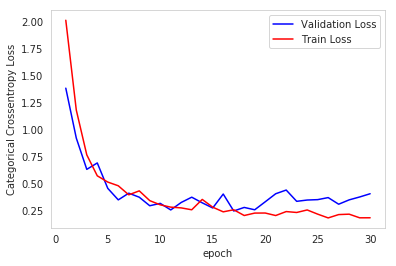

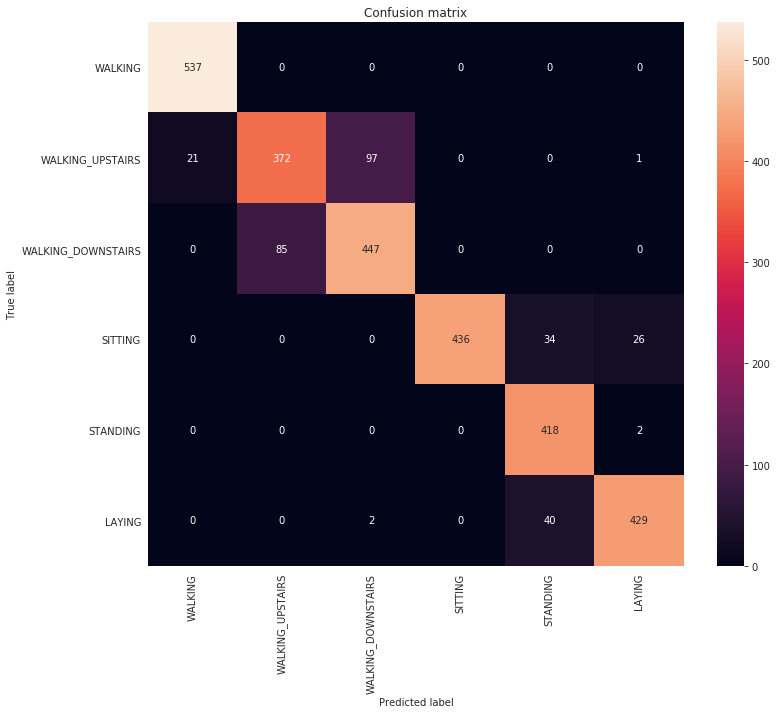

In [65]:
model7 = Sequential()
model7.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=L1L2(0.01,0.01)))
model7.add(BatchNormalization())
model7.add(Dropout(0.70))
model7.add(LSTM(48))
model7.add(Dropout(0.70))
model7.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model7.summary()


model7.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Training the model
history7  = model7.fit(X_train,
                           Y_train,
                           batch_size=batch_size,
                           validation_data=(X_test, Y_test),
                           epochs=epochs)

plot_train_cv_loss(history7, epochs)

scores = model7.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()
plot_confusion_matrix_lstm(Y_test,model7.predict(X_test))

In [91]:
scores = model7.evaluate(X_test, Y_test, verbose=0)
print("Test Loss:",scores[0])

('Test Loss:', 0.4043114403084813)


In [66]:
joblib.dump(model7,"./model7.pkl")

['./model7.pkl']

## Validation loss graph comparison of all models

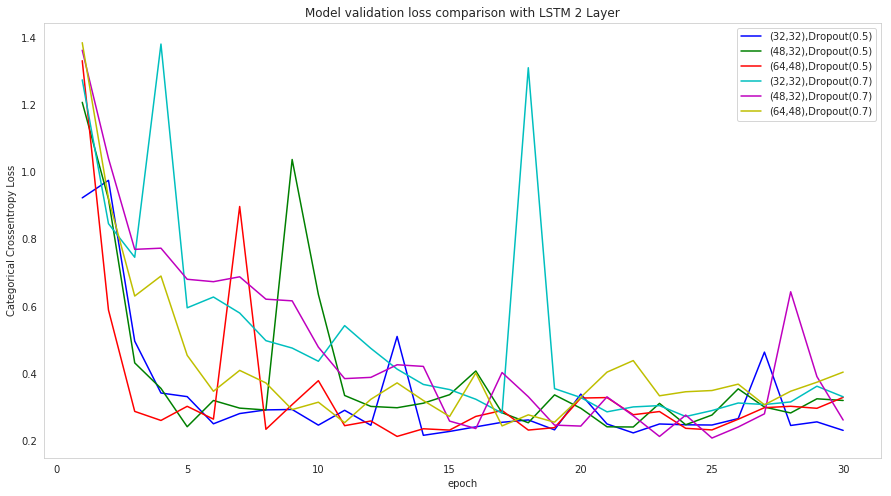

In [84]:
fig, ax = plt.subplots(1,1,figsize=(15,8))    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
x_axis_values = list(range(1,epochs+1))
# plt.figure(figsize=(12,14))
# validation_loss = model.history['val_loss']
# train_loss = model.history['loss']   
plt.title("Model validation loss comparison with LSTM 2 Layer")
ax.plot(x_axis_values, history1.history['val_loss'], 'b', label="(32,32),Dropout(0.5)")
ax.plot(x_axis_values, history3.history['val_loss'], 'g', label="(48,32),Dropout(0.5)")
ax.plot(x_axis_values, history4.history['val_loss'], 'r', label="(64,48),Dropout(0.5)")
ax.plot(x_axis_values, history5.history['val_loss'], 'c', label="(32,32),Dropout(0.7)")
ax.plot(x_axis_values, history6.history['val_loss'], 'm', label="(48,32),Dropout(0.7)")
ax.plot(x_axis_values, history7.history['val_loss'], 'y', label="(64,48),Dropout(0.7)")
# plt.show()
plt.legend()
plt.grid()
fig.canvas.draw()

## Validation Accuraccy graph comparison of all models

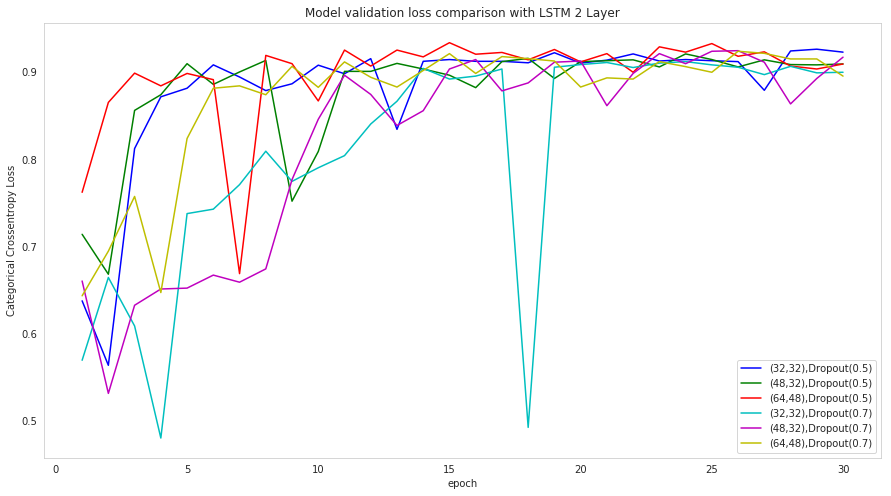

In [85]:
fig, ax = plt.subplots(1,1,figsize=(15,8))    
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
x_axis_values = list(range(1,epochs+1))
# plt.figure(figsize=(12,14))
# validation_loss = model.history['val_loss']
# train_loss = model.history['loss']   
plt.title("Model validation loss comparison with LSTM 2 Layer")
ax.plot(x_axis_values, history1.history['val_acc'], 'b', label="(32,32),Dropout(0.5)")
ax.plot(x_axis_values, history3.history['val_acc'], 'g', label="(48,32),Dropout(0.5)")
ax.plot(x_axis_values, history4.history['val_acc'], 'r', label="(64,48),Dropout(0.5)")
ax.plot(x_axis_values, history5.history['val_acc'], 'c', label="(32,32),Dropout(0.7)")
ax.plot(x_axis_values, history6.history['val_acc'], 'm', label="(48,32),Dropout(0.7)")
ax.plot(x_axis_values, history7.history['val_acc'], 'y', label="(64,48),Dropout(0.7)")
# plt.show()
plt.legend()
plt.grid()
fig.canvas.draw()

# Conclusion

In [93]:
from prettytable import PrettyTable

x = PrettyTable()
x.title = " Model Comparision "
x.field_names = ["LSTM Layers",'No. of Neurons in LSTM Layer','Dropout','Validation Acc %','Validation Loss']
x.add_row(["2","32","0.50",93.48,0.23])
x.add_row(["2","48","0.50",84.08,0.31])
x.add_row(["2","64","0.50",92.09,0.33])
x.add_row(["\n","\n","\n","\n","\n"])
x.add_row(["2","32","0.70",89.92,0.33])
x.add_row(["2","48","0.70",91.78,0.26])
x.add_row(["2","64","0.70",91.58,0.40])
print(x)

+-------------------------------------------------------------------------------------------+
|                                     Model Comparision                                     |
+-------------+------------------------------+---------+------------------+-----------------+
| LSTM Layers | No. of Neurons in LSTM Layer | Dropout | Validation Acc % | Validation Loss |
+-------------+------------------------------+---------+------------------+-----------------+
|      2      |              32              |   0.50  |      93.48       |       0.23      |
|      2      |              48              |   0.50  |      84.08       |       0.31      |
|      2      |              64              |   0.50  |      92.09       |       0.33      |
|             |                              |         |                  |                 |
|             |                              |         |                  |                 |
|      2      |              32              |   0.70  |    

> So we can say that model with 2 LSTM layer and with number of nuerons 32,dropout 0f 0.5 & also bacthnormalization with some L1 and L2 regularization we are getting maximum accuracy of 93.48% and loss of 0.23

> DeeP Learning help us to built models even when we don't have domain expert engineered features.

# Steps followed

#### 1) Obtain train and test data  

#### 2) Data Cleaning-Duplicates,null value check

#### 3) EDA on stationary and moving activities like sitting standing walking

#### 4) T-sne plot with different perplexity and iteration to check the overlap of classes

#### 5) Defined function to plot confusion matrix

#### 6) Defined function to run any machine learning model- tried logistic,Linear SVM, Kernel SVM , Decison tree,etc

#### 7) Compared the performance of model

#### 8) Applied deep learning technique like LSTM with different no of layer dropout and batchNormalization

#### 9) Compared the models

#### 10) Conclusion